# Supervised Learning: Regression

Link to the Kaggle challenge

https://www.kaggle.com/c/rossmann-store-sales/data

### Problem Statement

#### Predict the sales for a few identified stores on a given day

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("data/train.csv")
store = pd.read_csv("data/store.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Size and type of the train data

In [3]:
print("Shape:", df.shape)
df.head(5)

Shape: (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Size and type of the store data

In [4]:
print("Shape:", store.shape)
store.head(5)

Shape: (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Data Description
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

### Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Merge the datasets
Put data in unified form

In [5]:
df_new = df.merge(store, on=["Store"], how="inner")
print("Shape:", df_new.shape)
df_new.head(5)

Shape: (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [6]:
print("Number of stores:", len(df_new["Store"].unique()))
print("Number of days:", len(df_new["Date"].unique()))
print("Average sales for all stores:", round(df_new["Sales"].mean(),2))

Number of stores: 1115
Number of days: 942
Average sales for all stores: 5773.82


### Data Types

Object in Python is *character* data type

In [7]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

### Working with Time

In [8]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

### Create additional features
Convert column `Date` from Object to Date.

Breakdown of the `Date` column once converted to type Date.

New column `Season` based on the column `Month`

In [9]:
df_new["Date"] = pd.to_datetime(df_new["Date"], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week

df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]), "Spring",
                            np.where(df_new["Month"].isin([6,7,8]), "Summer",
                                     np.where(df_new["Month"].isin([9,10,11]), "Autumn",
                                              np.where(df_new["Month"].isin([12,1,2]), "Winter", 
                                                       "None"))))

In [10]:
df_new[["Date", "Year", "Quarter", "Month", "Week", "Day", "Season"]].head(5)

,Date,Year,Quarter,Month,Week,Day,Season
0,2015-07-31,2015,3,7,31,31,Summer
1,2015-07-30,2015,3,7,31,30,Summer
2,2015-07-29,2015,3,7,31,29,Summer
3,2015-07-28,2015,3,7,31,28,Summer
4,2015-07-27,2015,3,7,31,27,Summer


### Target value
*Sales* is the target value in the dataset - we are building the model to predict this value.

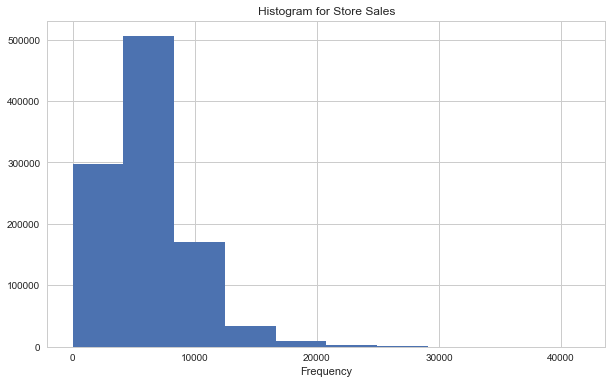

In [11]:
plt.figure(figsize=(10,6))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

Most of the stores have sales in the range 0 - 20,000.

<span style="color:red">Smart to remove outliers so the model could learn better.</span> Outliers are considered the stores with Sales above 20,000.

### Exploring Numeric Columns

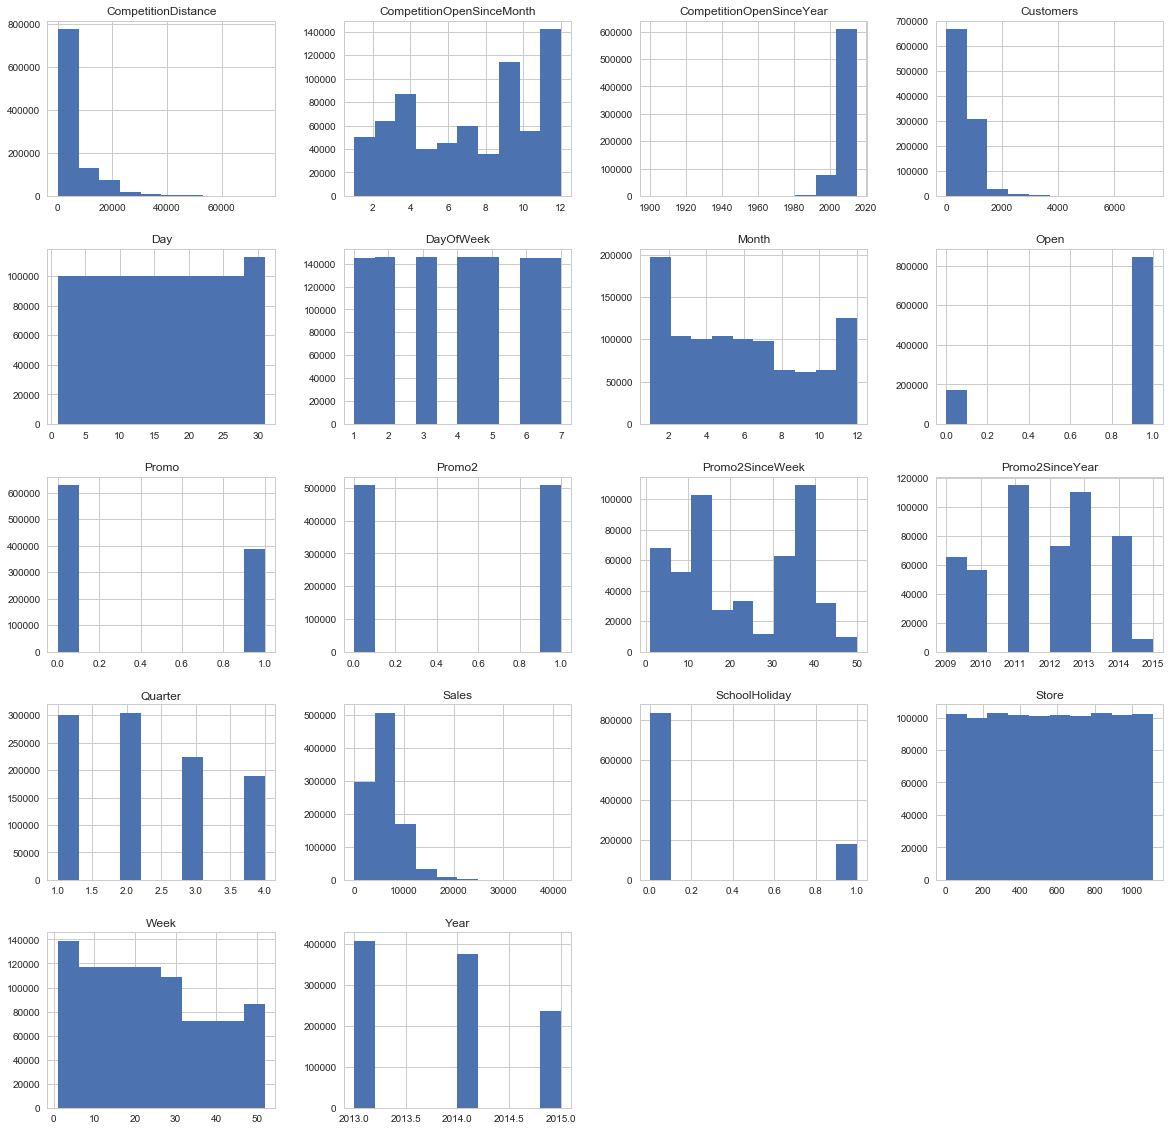

In [12]:
df_new.hist(figsize=(20,20))
plt.show()

Features *Open*, *Promo*, *Promo2*, *SchoolHoliday* are **binary categorical features** and already encoded as numerical columns (0,1).

Feature *Customers* has outliers since most numbers are in range 0 - 20,000. These outliers have to be fixed before modeling.

### Missing data
The plots above exclude null values.

In [13]:
df_new.isnull().sum()/df_new.shape[0]*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

Some features have over **30%** missing data. This is a big loss and not much can be done. A rule of thumb, <span style="color:red">a loss between 0% and 10% can be fixed by filling missing values.</span>

Feature *CompetitionDistance* has 0.25% missing values. This can be fixed.

Using **mean** or **mode** are the most common methods to replace missing data.

More complex methods, for cruical features, are **clustering** and **regression models**.

### Replace nulls with *mode*

In [14]:
df_new["CompetitionDistance"] = df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])

print("Sanity check. Percentage of null values in the feature:", 
      df_new["CompetitionDistance"].isnull().sum()/df_new["CompetitionDistance"].shape[0] * 100)

Sanity check. Percentage of null values in the feature: 0.0


### Categorical features
<span style="color:red">The best way to study categorical features is to study the impact on the target variable from their individual classes.</span>

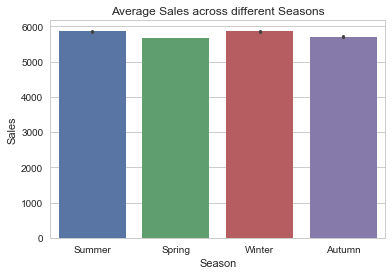

In [15]:
ax = sns.barplot(x="Season", y="Sales", data=df_new).set_title('Average Sales across different Seasons')

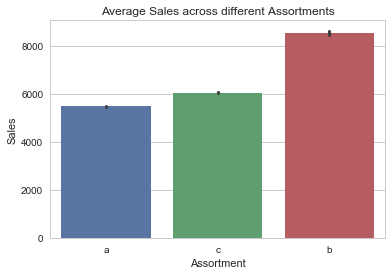

In [16]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new).set_title('Average Sales across different Assortments')

In [ ]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new).set_title('Average Sales across different StoreTypes')

Average sale per class for all categorical features can be misleading. We check the **count** - how many sales per class per category were done.

In [ ]:
ax = sns.barplot(x="Season", y="Sales", data=df_new, estimator=np.size).set_title('Count Sales across different Seasons')

In [ ]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new, estimator=np.size).set_title('Count Sales across different Assortments')

In [ ]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new, estimator=np.size).set_title('Count Sales across different StoreTypes')

### Data Engineering
Categorical features need to be converted to **one-hot encoded** form: categorical feature with 3 classes is represented as 3 columns with binary value for each class.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2",
"StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year",
"StoreType","Assortment","Season"]

In [ ]:
def create_ohe(df, col):
    """
    One hot encoding on a column in a dataframe
    """
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]

    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [ ]:
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)

In [ ]:
print("Shape of data:", temp.shape)
print("Datatypes in frame:", temp.dtypes.unique())

Still features with type *object*.

Find out which one:

In [ ]:
temp.columns[temp.dtypes == "object"]

In [ ]:
temp["StateHoliday"].unique()

Seems to hold incorrect values. It should have either 0 or 1.

We replace [a,b,c] with 1, rest with 0.

In [ ]:
temp["StateHoliday"] = np.where(temp["StateHoliday"] == 0, 0, 1)

In [ ]:
print("Sanity check for types in dataframe:\n", temp.dtypes.unique())

### Build training and test dataset
Train, validation and test dataset should be in ratio **60:20:20**. Since we have a big training dataset, the validation ratio can be smaller.

We first divide the dataset into **80:20**, take 20% for test and divide the 80% further into train and validate datasets with ratio 90:10.

In [ ]:
from sklearn.cross_validation import train_test_split

Divide dataset into train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(temp, df_new[target], test_size=0.2, random_state=2018)

Further divide train dataset into train and validate

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2018)

Check sizes of datasets

In [ ]:
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

### Baseline score
How do we determine whether our model is performing well?

Baseline score is **the bare minimum score** to consider the model useful.

For regression model, if we assume the mean value of sales in the training dataset as basic benchmark score.

The metric to use in this case is **mean absolute error (MAE)**.

In [ ]:
mean_sales = y_train.mean()
print("Average sales:", mean_sales)

In [ ]:
mae = abs(y_test - mean_sales).mean()[0]
print("Mean absolute error:", mae)

Baseline preformance is now known. Our Deep Learning models must deliver better (lower in this case) results than the baseli ne score.

### Designing the Deep Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

DNN with one layer and 150 neurons

44 is the amount of features - columns - in the dataset

In [ ]:
model = Sequential()
model.add(Dense(150, input_dim=44, activation="relu"))
model.add(Dense(1, activation="linear"))

Configure the model

In [ ]:
model.compile(optimizer="adam",
              loss="mean_absolute_error",
              metrics=["mean_absolute_error"]
             )

Train the model

In [ ]:
model.fit(x_train.values, y_train.values, validation_data=(x_val, y_val), epochs=10, batch_size=64)

### Testing Model Performance

In [ ]:
result = model.evaluate(x_test.values, y_test.values)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

### Improving the model with new loss function
We use **mean_squared_error** which penalizes higher error rates. We also all 2 hidden layers.

In [ ]:
model = Sequential()
model.add(Dense(150, input_dim=44, activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(1, activation="linear"))

In [ ]:
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

In [ ]:
history = model.fit(x_train,y_train, validation_data=(x_val,
y_val),epochs=10,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

### Deeper model
5 hidden layers with 150 neurons each.

In [ ]:
model = Sequential()
model.add(Dense(150, input_dim=44, activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(150, activation="relu"))
model.add(Dense(1, activation="linear"))

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])

In [ ]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=64)

In [ ]:
result = model.evaluate(x_test, y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

A small improvement, but not too much. Increasing the number of neurons and decreasing the number of layers is the next attempt.

2 hidden layers and 350 neurons in each.

In [ ]:
model = Sequential()
model.add(Dense(350, input_dim=44, activation="relu"))
model.add(Dense(350, activation="relu"))
model.add(Dense(1, activation="linear"))

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])

Save learning statistics for analysis

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=64)

In [ ]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Further improvement noticed. Still room for more exploration with deeper networks with more neurons.

### Plotting the Loss Metric Across Epochs

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing the Model Manually
Instead of using `evaluate` function testing could be done manually

In [ ]:
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales", "Predicted Sales"]
print(y_test.head(10))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MSE", mean_squared_error(y_true=y_test["Actual Sales"],
                                y_pred=y_test["Predicted Sales"]))

print ("MAE", mean_absolute_error(y_true=y_test["Actual Sales"],
                                  y_pred=y_test["Predicted Sales"]))